In [1]:
import pandas as pd


df = pd.read_csv('/Users/ulia/Desktop/EmployeeProductivityAnalysis/WA_Fn-UseC_-HR-Employee-Attrition.csv')


missing_values = df.isnull().sum()


total_missing = missing_values.sum()


print("Missing Values:")
print(missing_values)
print("\nTotal Missing Values:", total_missing)



Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [20]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

negative_values = (df[numeric_columns] < 0).sum()

negative_values = negative_values[negative_values > 0]


if negative_values.empty:
    print("no negative values found in numeric columns.")
else:
    print("Negative Values:")
    # Display the columns with negative values
    print("Columns with negative values:")
    print(negative_values)





no negative values found in numeric columns.


In [21]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [5]:
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')


KeyError: 'Hire_Date'

In [7]:
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")


Minimum age: 18
Maximum age: 60


In [8]:
print(df["Age"].describe())



count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


In [23]:
invalid_salary = df[df['Monthly_Salary'] < 0]
print(f"\nSubzero Salaries:\n{invalid_salary[['Employee_ID', 'Monthly_Salary']]}")


KeyError: 'Monthly_Salary'

In [24]:
from datetime import datetime
today = datetime.today()

future_hires = df[df['Hire_Date'] > today]
print(f"\nEmployees hired in the future:\n{future_hires[['Employee_ID', 'Hire_Date']]}")

old_hires = df[df['Hire_Date'] < '1950-01-01']
print(f"\nEmployees hired before 1950:\n{old_hires[['Employee_ID', 'Hire_Date']]}")


KeyError: 'Hire_Date'

In [11]:


print("\n (Gender):")
print(df['Gender'].unique())

print("\n(Education_Level):")
print(df['Education_Level'].unique())

print("\n (Department):")
print(df['Department'].unique())



 (Gender):
['Female' 'Male']

(Education_Level):


KeyError: 'Education_Level'

In [12]:

print(df.columns)




Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [13]:
print(df[["Education_Level", "Years_At_Company", "Performance_Score"]].isnull().sum())

KeyError: "None of [Index(['Education_Level', 'Years_At_Company', 'Performance_Score'], dtype='object')] are in the [columns]"

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.barplot(data=df, x="Education_Level", y="Performance_Score", estimator=np.mean, ci="sd")
plt.title("Average Performance Score by Education Level")
plt.xticks(rotation=45)
plt.show()






/var/folders/st/fk1vq_zx1yx9fqx2l_llr7z80000gn/T/ipykernel_9332/1038880923.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Education_Level", y="Performance_Score", estimator=np.mean, ci="sd")


ValueError: Could not interpret value `Education_Level` for `x`. An entry with this name does not appear in `data`.

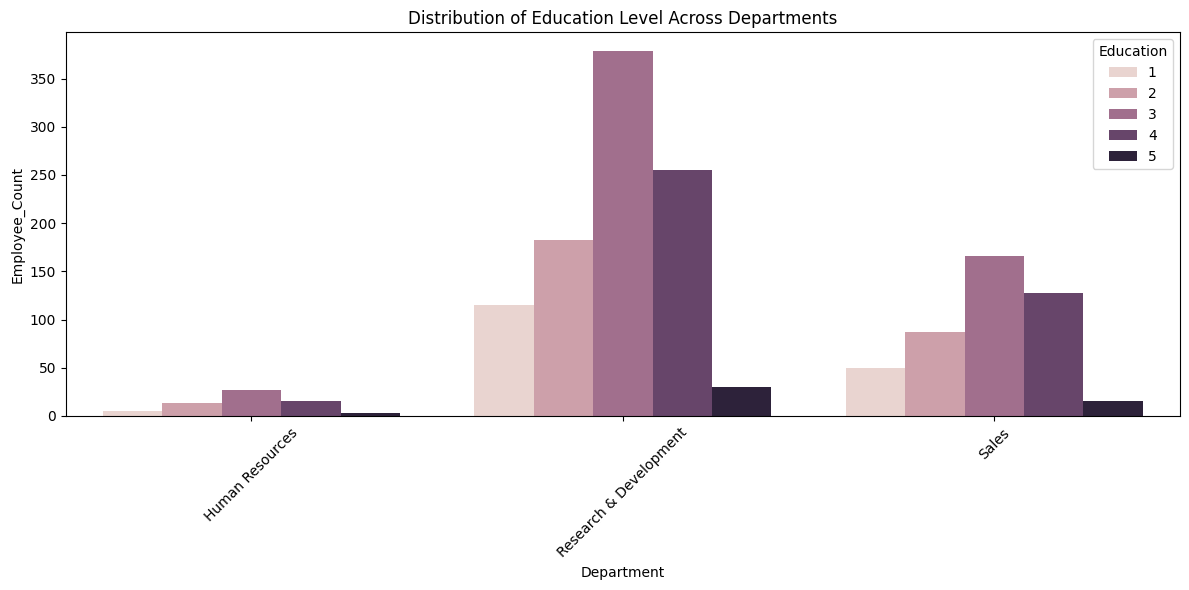

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

# Считаем количество сотрудников по департаменту и уровню образования
education_distribution = df.groupby(["Department", "Education"]).size().reset_index(name="Employee_Count")

# Теперь education_distribution — НОВЫЙ датафрейм!

# Строим график
plt.figure(figsize=(12,6))
sns.barplot(
    data=education_distribution,
    x="Department",
    y="Employee_Count",
    hue="Education"
)

plt.title("Distribution of Education Level Across Departments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import f_oneway

groups = [group["Performance_Score"].values for name, group in df.groupby("Education_Level")]
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA p-value: {p_value}")


ANOVA p-value: 0.07123866486159823


In [18]:
# Создаём датафрейм для регрессии
df_reg = df[["PerformanceRating", "Education", "YearsInCurrentRole", "Age", "TrainingTimesLastYear", "NumCompaniesWorked"]].copy()

# Удаляем строки с пропущенными значениями
df_reg = df_reg.dropna()

# Преобразуем всё в числовой формат
df_reg = df_reg.apply(pd.to_numeric, errors='coerce')

# На всякий случай ещё раз убираем пропуски после приведения к числам
df_reg = df_reg.dropna()



In [ ]:
#Check if nan after to_numeric()
df_reg = df_reg.dropna()


In [20]:
print(df_reg.shape)
print(df_reg.head())


(0, 6)
Empty DataFrame
Columns: [Performance_Score, Education_Level, Years_At_Company, Age, Training_Hours, Promotions]
Index: []


In [21]:
education_map = {
    "High School": 1,
    "Associate": 2,
    "Bachelor": 3,
    "Master": 4,
    "PhD": 5
}

df["Education_Level"] = df["Education_Level"].map(education_map)


In [19]:
print(df["Education_Level"].isna().sum())


KeyError: 'Education_Level'

In [23]:

df_reg = df[["Performance_Score", "Education_Level", "Years_At_Company", "Age", "Training_Hours", "Promotions"]].copy()
df_reg = df_reg.dropna()


In [24]:
import statsmodels.api as sm

X = df_reg[["Education_Level", "Years_At_Company", "Age", "Training_Hours", "Promotions"]]
y = df_reg["Performance_Score"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4602
Date:                Wed, 07 May 2025   Prob (F-statistic):              0.806
Time:                        15:20:17   Log-Likelihood:            -1.7659e+05
No. Observations:              100000   AIC:                         3.532e+05
Df Residuals:                   99994   BIC:                         3.532e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9828      0.023  